### Assignment 2 - ES60011
Name: Bannuru Rohit Kumar Reddy\
Roll No: 21CS30011

Importing necessary libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# import accuracy_score
from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Import the polynomial features
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import classification_report, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler

# Import standard scaler
from sklearn.preprocessing import StandardScaler

### EDA

Loading data and printing basic information

In [17]:
data = pd.read_csv('framingham.csv')
print(data.head())
print(data.info())

print(data['TenYearCHD'].value_counts())

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

Notice that there is uneven distribution of the people who have the disease and people who don't. \
\
Since glucose has a lot of missing values, analyzing if we drop the na values, how many of 1's will get drop ( We need to make sure of this as there a few 1's, to make sure we are not dropping a lot of them)

In [18]:
# In the missing glucose values, find how many of them have heart disease
print(data[data['glucose'].isnull()]['TenYearCHD'].value_counts())

0    338
1     50
Name: TenYearCHD, dtype: int64


Plotting the frequency distribution of each feature stored in the plot folder

In [19]:
# Plot the frequency distribution of each variable seperately and save the plots in the plots folder
for i in data.columns:
    plt.hist(data[i].dropna())
    plt.title(i)
    plt.savefig('plots/' + i + '.png')
    plt.close()

Since the diease is highly correlated with 'age' we will try to analyze the number number of people who have the disease for each age group

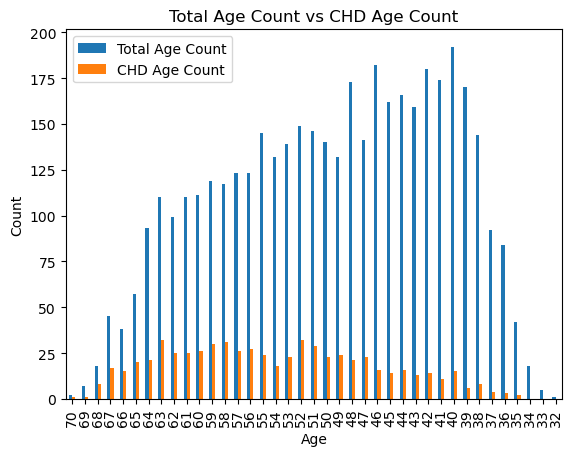

In [20]:
# Find the number of people with heart disease for each age, print the total number of people followed by the number of people with heart disease side by side
# Create two Series for comparison
age_counts = data['age'].value_counts().sort_index(ascending=False)
chd_age_counts = data[data['TenYearCHD'] == 1]['age'].value_counts().sort_index(ascending=False)

# Concatenate the two Series side by side
side_by_side = pd.concat([age_counts, chd_age_counts], axis=1, keys=['Total Age Count', 'CHD Age Count'])

# Plot the side by side comparison
side_by_side.plot(kind='bar')
plt.title('Total Age Count vs CHD Age Count')
plt.xlabel('Age')
plt.ylabel('Count')

# Display the plot
plt.show()



In [21]:
# Above age 64 find the number of people with heart disease
print(data[data['age'] > 64]['TenYearCHD'].value_counts())

0    105
1     62
Name: TenYearCHD, dtype: int64


In [22]:
# Finding the correlation between each variable and the ouptput variable 'TenYearCHD'

correlation = data.corr()['TenYearCHD']
print(correlation)

male               0.088374
age                0.225408
education         -0.054248
currentSmoker      0.019448
cigsPerDay         0.057755
BPMeds             0.087519
prevalentStroke    0.061823
prevalentHyp       0.177458
diabetes           0.097344
totChol            0.082369
sysBP              0.216374
diaBP              0.145112
BMI                0.075300
heartRate          0.022907
glucose            0.125590
TenYearCHD         1.000000
Name: TenYearCHD, dtype: float64


Numerical variables which have only 2 values, analyzing the percentage of 1's and 0's in each of them

In [23]:
# Print the unique values of each variable
category = []

for i in data.columns:
    #print(i, data[i].unique())
    if(len(data[i].unique()) < 10):
        category += [i]
        
print(category)


# For each feature in category print he value counts of each category and the percentage of 1s in the TenYearCHD column
for i in category:
    print(data[i].value_counts())
    print(data.groupby(i)['TenYearCHD'].mean())

['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
0    2420
1    1820
Name: male, dtype: int64
male
0    0.124380
1    0.188462
Name: TenYearCHD, dtype: float64
1.0    1720
2.0    1253
3.0     689
4.0     473
Name: education, dtype: int64
education
1.0    0.187791
2.0    0.117318
3.0    0.127721
4.0    0.147992
Name: TenYearCHD, dtype: float64
0    2145
1    2095
Name: currentSmoker, dtype: int64
currentSmoker
0    0.144988
1    0.158950
Name: TenYearCHD, dtype: float64
0.0    4063
1.0     124
Name: BPMeds, dtype: int64
BPMeds
0.0    0.145705
1.0    0.330645
Name: TenYearCHD, dtype: float64
0    4215
1      25
Name: prevalentStroke, dtype: int64
prevalentStroke
0    0.150178
1    0.440000
Name: TenYearCHD, dtype: float64
0    2923
1    1317
Name: prevalentHyp, dtype: int64
prevalentHyp
0    0.109134
1    0.246773
Name: TenYearCHD, dtype: float64
0    4131
1     109
Name: diabetes, dtype: int64
diabetes
0    0.146212
1    0.366

Finding correlation between the target and the features 

In [24]:
# Drop NaN values
data = data.dropna()

# Compute and print correlation with target variable for original features
print("\nCorrelation with TenYearCHD for original features:")
print(data.corr()['TenYearCHD'])


Correlation with TenYearCHD for original features:
male               0.091688
age                0.233983
education         -0.063279
currentSmoker      0.019165
cigsPerDay         0.052014
BPMeds             0.089152
prevalentStroke    0.048366
prevalentHyp       0.181387
diabetes           0.093431
totChol            0.091338
sysBP              0.222821
diaBP              0.150124
BMI                0.082055
heartRate          0.020514
glucose            0.121990
TenYearCHD         1.000000
Name: TenYearCHD, dtype: float64


Calculating the polynomial features and also finding their correlation to see if any important features are created

In [25]:
# Create df by dropping the output variable
df = data.drop('TenYearCHD', axis=1)

# Create the polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df)

# Get feature names
feature_names = poly.get_feature_names(df.columns)

# Create a dataframe from the polynomial features
df_poly = pd.DataFrame(poly_features, columns=feature_names)

# Add the output variable to the dataframe
df_poly['TenYearCHD'] = data['TenYearCHD']

# Combine original and polynomial features
df_combined = pd.concat([df, df_poly], axis=1)
df_combined['TenYearCHD'] = data['TenYearCHD']

# Compute correlations for both original and polynomial features
correlation_combined = df_combined.corr()['TenYearCHD']

print("\nCorrelation with TenYearCHD for all features:")
print(correlation_combined.sort_values(ascending=True))

#  Print the top 10 features with the highest correlation with the output variable
print(correlation_combined.sort_values(ascending=False).head(10))

c:\Users\USER\anaconda3\envs\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



Correlation with TenYearCHD for all features:
education       -0.063279
age totChol     -0.035763
totChol^2       -0.033075
totChol         -0.032990
totChol diaBP   -0.031244
                   ...   
diaBP            0.150124
prevalentHyp     0.181387
sysBP            0.222821
age              0.233983
TenYearCHD       1.000000
Name: TenYearCHD, Length: 151, dtype: float64
TenYearCHD      1.000000
age             0.233983
sysBP           0.222821
prevalentHyp    0.181387
diaBP           0.150124
glucose         0.121990
diabetes        0.093431
male            0.091688
totChol         0.091338
BPMeds          0.089152
Name: TenYearCHD, dtype: float64


### Training Model

Since no polynomial features with high correlation value were found, we will stick with the orignal features to train the logistic regression model

In [26]:
# Train model with all the features to predict the TenYearCHD from the original dataset
X = data.drop('TenYearCHD', axis=1)
y = data['TenYearCHD']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:


# Assuming 'data' is your DataFrame
# If not, uncomment and modify the following line:
# data = pd.read_csv('your_data_file.csv')

# Prepare the data
X = data.drop('TenYearCHD', axis=1)
y = data['TenYearCHD']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
class SimpleLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.num_iterations):
            model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(model)
            
            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict_proba(self, X):
        model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(model)
    
    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) > threshold).astype(int)

# Train the model
model = SimpleLogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print("Classification report:")
print(classification_report(y_test, y_pred))

C:\Users\USER\AppData\Local\Temp\ipykernel_3920\137939665.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Accuracy: 0.8397085610200364
Confusion matrix:
[[922   0]
 [176   0]]
Classification report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       922
           1       0.00      0.00      0.00       176

    accuracy                           0.84      1098
   macro avg       0.42      0.50      0.46      1098
weighted avg       0.71      0.84      0.77      1098



c:\Users\USER\anaconda3\envs\env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\anaconda3\envs\env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\anaconda3\envs\env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Training Accurate model able to predict heart disease

##### Note: From the confusion matrix and the precision and recall score of 1 we can see that the number of true positives predicted is 0

This is because the data is highly skewed towards predicting 0's\
\
We will try to reduce this by using random Undersampling to make sure that there are equal number of 1's and 0's and Using UnderSampler because not creating any artifical data

In [29]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.under_sampling import RandomUnderSampler

class SimpleLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
   
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
   
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
       
        for _ in range(self.num_iterations):
            model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(model)
           
            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)
           
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
   
    def predict_proba(self, X):
        model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(model)
   
    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) > threshold).astype(int)


# Apply random undersampling to the training data
undersampler = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train, y_train)

# Train the model on balanced data
model = SimpleLogisticRegression(learning_rate=0.01, num_iterations=1000)
model.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred = model.predict(X_test)

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print("Classification report:")
print(classification_report(y_test, y_pred))

C:\Users\USER\AppData\Local\Temp\ipykernel_3920\1615366367.py:13: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Accuracy: 0.8278688524590164
Confusion matrix:
[[890  32]
 [157  19]]
Classification report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       922
           1       0.37      0.11      0.17       176

    accuracy                           0.83      1098
   macro avg       0.61      0.54      0.54      1098
weighted avg       0.77      0.83      0.79      1098



#### Now we can see that that the confusion matrix is more appropirate and actually abe to predict the cases which have 'TenyearCHD'

This slight decrease in accuracy is also justified, as now the model is not randomly prediciting all values as 0, which we definelty don't want